In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [12]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [13]:
# reflect an existing database into a new model
Base = automap_base()



# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [19]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23',)

Text(0.5, 1.0, 'Precipitation data for the last 12 months')

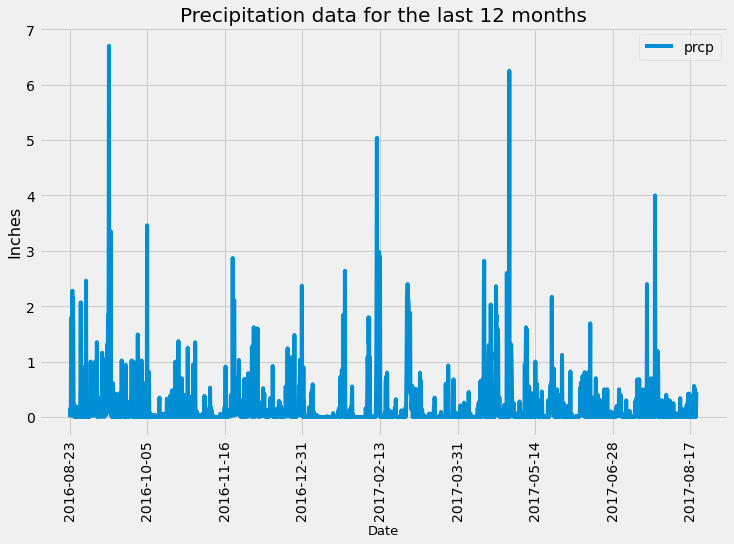

In [55]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

twelve_month_prcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >= '2016-08-23').\
                        order_by(Measurement.date).all()




# Use Pandas Plotting with Matplotlib to plot the data
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
prcp_df = pd.DataFrame(twelve_month_prcp ).set_index('date')
prcp_df.dropna(inplace =  True)



# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot(figsize=(11,7), rot = 90)
plt.xlabel("Date",  size = 13)
plt.ylabel("Inches", size = 16)
plt.title("Precipitation data for the last 12 months", size = 20)







In [56]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [57]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()


[(9,)]

In [62]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
Most_active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [81]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_low_high_avg =session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station==Most_active_station[0][0]).all()

temp_low_high_avg

[(54.0, 85.0, 71.66378066378067)]

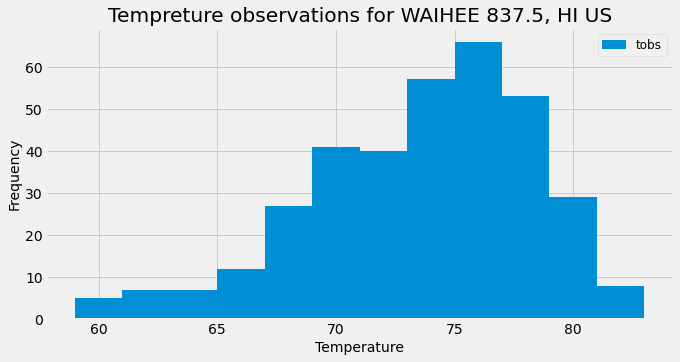

In [109]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temp_observation = session.query(Measurement.tobs).\
    filter(Measurement.date>='2016-08-23').\
    filter(Station.station == Measurement.station).\
    filter(Station.station== 'USC00519281').all()


#temp_observation

temp_observation = pd.DataFrame(temp_observation)
temp_observation.head()

fig = plt.figure()
fig.set_size_inches(10, 5)
plt.hist(temp_observation, 12, label = 'tobs')
plt.xlabel("Temperature", size = 14)
plt.ylabel("Frequency", size = 14)
plt.title(f"Tempreture observations for WAIHEE 837.5, HI US")
plt.legend(fontsize=12)

plt.show()


# Close session

In [ ]:
# Close Session
session.close()